1



0: 480x640 1 person, 1 couch, 1 refrigerator, 588.5ms
Speed: 1.0ms preprocess, 588.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)
Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 21.35it/s]

0: 480x640 1 person, 2 couchs, 1 refrigerator, 589.7ms
Speed: 2.0ms preprocess, 589.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)
Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 21.29it/s]

0: 480x640 1 person, 1 couch, 1 refrigerator, 607.1ms
Speed: 1.0ms preprocess, 607.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)
Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 20.89it/s]

0: 480x640 1 person, 2 couchs, 627.8ms
Speed: 1.0ms preprocess, 627.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)
Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 20.89it/s]

0: 480x640 1 person, 2 couchs, 607.8ms
Speed: 1.0ms preprocess, 607.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)
Action: emot

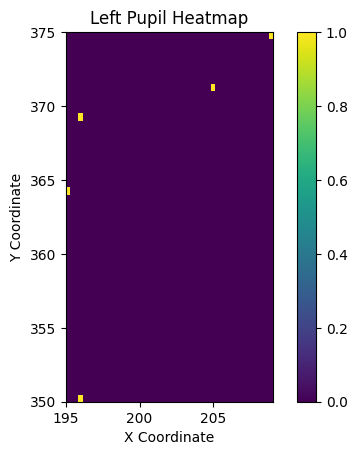

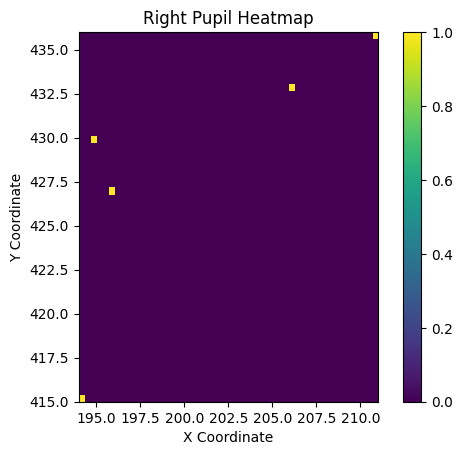

0.0


Exception in Tkinter callback
Traceback (most recent call last):
  File "c:\Users\abdal\miniconda3\lib\tkinter\__init__.py", line 1892, in __call__
    return self.func(*args)
  File "C:\Users\abdal\AppData\Local\Temp\ipykernel_29244\3154359952.py", line 196, in endride
    self.starride.destroy()
  File "c:\Users\abdal\miniconda3\lib\tkinter\__init__.py", line 2580, in destroy
    self.tk.call('destroy', self._w)
_tkinter.TclError: can't invoke "destroy" command: application has been destroyed


In [2]:
import os.path
import datetime
import pickle
import tkinter as tk
import cv2
from PIL import Image, ImageTk
import face_recognition
import os
import objectTracking
import util
import cv2
from gaze_tracking import GazeTracking
import numpy as np
import matplotlib.pyplot as plt
import example
import threading
#from test import test
import facialexp

class App:
    def __init__(self):
        self.main_window = tk.Tk()
        self.main_window.geometry("1200x520+350+100")
        self.ss = False
        self.login_button_main_window = util.get_button(self.main_window, 'login', 'green', self.login)
        self.login_button_main_window.place(x=750, y=100)
        self.x = 0
        self.startss = 0
        self.blink=0
        self.right=0
        self.left=0
        self.center=0
        self.left_pupil_coordinates = []
        self.right_pupil_coordinates = []
        self.text = 'Not Yet'
        self.left_pupil = None
        self.right_pupil = None
        # self.logout_button_main_window = util.get_button(self.main_window, 'logout', 'red', self.logout)
        # self.logout_button_main_window.place(x=750, y=200)
        self.font = cv2.FONT_HERSHEY_SIMPLEX
        self.text_position = (10, 50)  # (x, y) coordinates of the text start point
        self.font_scale = 1
        self.font_color = (255, 0, 0)  # BGR color; (255, 0, 0) is blue
        self.state_color = (0,255,0)
        self.line_type = 2
        self.register_new_user_button_main_window = util.get_button(self.main_window, 'Register new user', 'gray',
                                                                    self.register_new_user, fg='black')
        self.register_new_user_button_main_window.place(x=750, y=300)

        self.webcam_label = util.get_img_label(self.main_window)
        self.webcam_label.place(x=10, y=0, width=700, height=500)

        self.add_webcam(self.webcam_label)

        self.db_dir = './db'
        if not os.path.exists(self.db_dir):
            os.mkdir(self.db_dir)

        self.log_path = './log.txt'

    def add_webcam(self, label):
        if 'cap' not in self.__dict__:
            self.cap = cv2.VideoCapture(0)

        self._label = label
        self.process_webcam()

    def process_webcam(self):
        ret, frame = self.cap.read()
        if self.ss:
            if self.startss % 100 == 0:
                self.x = objectTracking.main(frame)
                self.text,self.blink,self.right,self.left,self.center,self.left_pupil,self.right_pupil=example.gazetrack(self.blink,self.right,self.left,self.center,frame)
                facexp = facialexp.facialexp(frame)
                if facexp:
                    self.state_color = (0,0,255)
                if self.left_pupil != None and self.right_pupil != None:
                    self.left_pupil_coordinates.append((self.left_pupil[0], self.left_pupil[1]))
                    self.right_pupil_coordinates.append((self.right_pupil[0], self.right_pupil[1]))

            self.startss += 1

            cv2.putText(frame,'Persons: ' + str(self.x), self.text_position, self.font, self.font_scale, self.font_color, self.line_type)
            cv2.putText(frame,str(self.text), (400,50), self.font, self.font_scale, self.font_color, self.line_type)
            cv2.putText(frame,'State', (250,50), self.font, self.font_scale, self.state_color, self.line_type)
            #cv2.imshow('Webcam Feed', frame)
            #cv2.waitKey(1)
        self.most_recent_capture_arr = frame
        img_ = cv2.cvtColor(self.most_recent_capture_arr, cv2.COLOR_BGR2RGB)
        self.most_recent_capture_pil = Image.fromarray(img_)
        imgtk = ImageTk.PhotoImage(image=self.most_recent_capture_pil)
        self._label.imgtk = imgtk
        self._label.configure(image=imgtk)

        self._label.after(20, self.process_webcam)

    def login(self):

        name = util.recognize(self.most_recent_capture_arr,self.db_dir)
        if name == 'unknown_person' or name == 'no_persons_found':
            util.msg_box('Failed','Unknown user')
        else:
            filename = 'users/{}.txt'.format(name)
            util.msg_box('Welcome Back', 'Welcome, {}.'.format(name))
            with open(filename, 'r') as file:
                content = file.read()
                print(content[-1])
            self.loginuser_window = tk.Toplevel(self.main_window)
            self.loginuser_window.geometry("520x520+370+120")
            self.start_rideb = util.get_button(self.loginuser_window, 'Start Ride', 'Green', self.startride)
            self.start_rideb.place(x=100, y=100)
            if int(content[-1]) == 1:
                self.update_userb = util.get_button(self.loginuser_window, 'Update User', 'Blue', self.update_user)
                self.update_userb.place(x=100, y=200)

                self.delete_userb = util.get_button(self.loginuser_window, 'Delete User', 'red', self.delete_user)
                self.delete_userb.place(x=100, y=300)
                
                # os.remove(unknown_img_path)
        with open(self.log_path, 'a') as f:
            f.write('{},{},in\n'.format(name, datetime.datetime.now()))
            f.close()
    def startride(self):
        self.starride = tk.Toplevel(self.main_window)
        self.starride.geometry("1200x520+350+100")
        self.webcam_label = util.get_img_label(self.starride)
        self.webcam_label.place(x=10, y=0, width=700, height=500)
        self.add_webcam(self.webcam_label) 
        self.endrideb = util.get_button(self.starride, 'End Ride', 'red', self.endride)
        self.endrideb.place(x=750, y=300)

      
        self.ss = True
        # self.login_button_main_window = util.get_button(self.starride, 'login', 'green', self.login)
        # self.login_button_main_window.place(x=750, y=100)

        # # self.logout_button_main_window = util.get_button(self.main_window, 'logout', 'red', self.logout)
        # # self.logout_button_main_window.place(x=750, y=200)

        # self.register_new_user_button_main_window = util.get_button(self.starride, 'Register new user', 'gray',
        #                                                             self.register_new_user, fg='black')
        # self.register_new_user_button_main_window.place(x=750, y=300)

        # self.webcam_label = util.get_img_label(self.starride)
        # self.webcam_label.place(x=10, y=0, width=700, height=500)

        # self.add_webcam(self.webcam_label)
        #self.main_window.destroy()
    def endride(self):
        self.left_pupil_coordinates = np.array(self.left_pupil_coordinates)
        self.right_pupil_coordinates = np.array(self.right_pupil_coordinates)

        # Generate a heatmap for the left and right pupil coordinates
        heatmap_left, xedges_left, yedges_left = np.histogram2d(self.left_pupil_coordinates[:, 1], self.left_pupil_coordinates[:, 0], bins=50)
        heatmap_right, xedges_right, yedges_right = np.histogram2d(self.right_pupil_coordinates[:, 1], self.right_pupil_coordinates[:, 0], bins=50)

        # Create a meshgrid from the histogram bin edges
        X_left, Y_left = np.meshgrid(xedges_left, yedges_left)
        X_right, Y_right = np.meshgrid(xedges_right, yedges_right)

        # Plot the left pupil heatmap
        plt.figure()
        plt.imshow(heatmap_left.T, origin='lower', extent=[xedges_left[0], xedges_left[-1], yedges_left[0], yedges_left[-1]])
        plt.colorbar()
        plt.title('Left Pupil Heatmap')
        plt.xlabel('X Coordinate')
        plt.ylabel('Y Coordinate')
        plt.show()

        # Plot the right pupil heatmap
        plt.figure()
        plt.imshow(heatmap_right.T, origin='lower', extent=[xedges_right[0], xedges_right[-1], yedges_right[0], yedges_right[-1]])
        plt.colorbar()
        plt.title('Right Pupil Heatmap')
        plt.xlabel('X Coordinate')
        plt.ylabel('Y Coordinate')
        plt.show()
        
        tot=self.blink+self.right+self.left+self.center
        blinkp=(self.blink/tot)*100
        rightp=(self.right/tot)*100
        leftp=(self.left/tot)*100
        centerp=(self.center/tot)*100
        # text_file = open(chosentxt, "w")
        # text_file.write(my_text_box.get(1.0, END))
        # text_file.close()

        with open("output.txt","w+") as file:
            file.write(f'You spent { str(blinkp)} % of your ride blinking \n')
            file.write(f'You spent { str(rightp)} % of your ride looking at the right \n')
            file.write(f'You spent { str(leftp)} % of your ride looking at the left \n')
            file.write(f'You spent { str(centerp)} % of your ride looking at the center \n')
            print(str(blinkp))
        cv2.destroyAllWindows()
        self.main_window.destroy()
        self.starride.destroy()
        
    def delete_user(self):
        self.delete_user_window = tk.Toplevel(self.main_window)
        self.delete_user_window.geometry("520x520+370+120")
        self.loginuser_window.destroy()
        self.deletelabel = util.get_text_label(self.delete_user_window, 'Username:')
        self.deletelabel.place(x=100, y=20)
        self.delete_text = util.get_entry_text(self.delete_user_window)
        self.delete_text.place(x=100, y=55)
        self.delete_button = util.get_button(self.delete_user_window, 'Delete User', 'Red', self.confirm_delete)
        self.delete_button.place(x=100, y=365)
    def confirm_delete(self):
        name = self.delete_text.get(1.0, "end-1c")
        if name:
            filename = 'users/{}.txt'.format(name)
            picklefilename = 'db/{}.pickle'.format(name)
            if os.path.exists(filename):
                os.remove(filename)
                os.remove(picklefilename)
                util.msg_box('Success!', 'User was deleted successfully !')
    def update_user(self):
        
        self.update_user_window = tk.Toplevel(self.main_window)
        self.update_user_window.geometry("520x520+370+120")
        self.loginuser_window.destroy()
        self.text_label_register_upload_user = util.get_text_label(self.update_user_window, 'Username:')
        self.text_label_register_upload_user.place(x=100, y=20)
        self.entry_text_register_upload_user = util.get_entry_text(self.update_user_window)
        self.entry_text_register_upload_user.place(x=100, y=55)

        self.text_label_register_upload_user1 = util.get_text_label(self.update_user_window, 'Seat Level:')
        self.text_label_register_upload_user1.place(x=100, y=90)
        self.entry_text_register_upload_user1 = util.get_entry_text(self.update_user_window)
        self.entry_text_register_upload_user1.place(x=100, y=125)

        self.text_label_register_upload_user2 = util.get_text_label(self.update_user_window, 'Volume Level:')
        self.text_label_register_upload_user2.place(x=100, y=160)
        self.entry_text_register_upload_user2 = util.get_entry_text(self.update_user_window)
        self.entry_text_register_upload_user2.place(x=100, y=195)

        self.text_label_register_upload_user3 = util.get_text_label(self.update_user_window, 'Position:')
        self.text_label_register_upload_user3.place(x=100, y=230)
        self.entry_text_register_upload_user3 = util.get_entry_text(self.update_user_window)
        self.entry_text_register_upload_user3.place(x=100, y=265)

        self.update_user_button = util.get_button(self.update_user_window, 'Update User', 'Blue', self.confirm_update)
        self.update_user_button.place(x=100, y=365)
    def confirm_update(self):
        alles = []
        name = self.entry_text_register_upload_user.get(1.0, "end-1c")
        SeatLevel = self.entry_text_register_upload_user1.get(1.0, "end-1c")
        VolumeLevel = self.entry_text_register_upload_user2.get(1.0, "end-1c")
        Position = self.entry_text_register_upload_user3.get(1.0, "end-1c")

        if name and SeatLevel and VolumeLevel and Position:
            
            filename = 'users/{}.txt'.format(name)
            if os.path.exists(filename):
                if SeatLevel.isdigit() and VolumeLevel.isdigit() and Position.isdigit():
                    if Position == '0' or Position =='1':
                        alles.append(name)
                        alles.append(SeatLevel)
                        alles.append(VolumeLevel)
                        alles.append(Position)
                        joined = ','.join(alles)
                        try:
                            with open(filename, 'w') as file:
                                file.write(joined)
                        except Exception as e:
                            print(f"An error occurred: {e}")


                        util.msg_box('Success!', 'User was Updated successfully !')
                        self.update_user_window.destroy()
                    else:
                        util.msg_box('Error!', 'Invalid position')

                else:
                    util.msg_box('Error!', 'Only integer values for seat and volume level are allowed!')
            else:
                util.msg_box('Error!', 'No such user')

        else:
            util.msg_box('Error', 'No empty fields allowed')


    # def logout(self):

    #     # label = test(
    #     #         image=self.most_recent_capture_arr,
    #     #         model_dir='/home/phillip/Desktop/todays_tutorial/27_face_recognition_spoofing/code/face-attendance-system/Silent-Face-Anti-Spoofing/resources/anti_spoof_models',
    #     #         device_id=0
    #     #         )

    #     # if label == 1:

    #     name = util.recognize(self.most_recent_capture_arr, self.db_dir)

    #     if name == 'unknown_person' or name == 'no_persons_found':
    #         util.msg_box('Failed', 'Unknown user. Please register new user or try again.')
    #     else:
    #         util.msg_box('Logout', 'Goodbye, {}.'.format(name))
    #         with open(self.log_path, 'a') as f:
    #             f.write('{},{},out\n'.format(name, datetime.datetime.now()))
    #             f.close()

    #     # else:
    #     #     util.msg_box('Hey, you are a spoofer!', 'You are fake !')


    def register_new_user(self):
        self.register_new_user_window = tk.Toplevel(self.main_window)
        self.register_new_user_window.geometry("1200x520+370+120")

        self.accept_button_register_new_user_window = util.get_button(self.register_new_user_window, 'Add', 'green', self.accept_register_new_user)
        self.accept_button_register_new_user_window.place(x=750, y=300)

        self.try_again_button_register_new_user_window = util.get_button(self.register_new_user_window, 'New Photo', 'red', self.try_again_register_new_user)
        self.try_again_button_register_new_user_window.place(x=750, y=400)

        self.capture_label = util.get_img_label(self.register_new_user_window)
        self.capture_label.place(x=10, y=0, width=700, height=500)

        self.add_img_to_label(self.capture_label)
        
        self.text_label_register_new_user = util.get_text_label(self.register_new_user_window, 'Username:')
        self.text_label_register_new_user.place(x=750, y=20)
        self.entry_text_register_new_user = util.get_entry_text(self.register_new_user_window)
        self.entry_text_register_new_user.place(x=750, y=55)

        self.text_label_register_new_user1 = util.get_text_label(self.register_new_user_window, 'Seat Level:')
        self.text_label_register_new_user1.place(x=750, y=90)
        self.entry_text_register_new_user1 = util.get_entry_text(self.register_new_user_window)
        self.entry_text_register_new_user1.place(x=750, y=125)

        self.text_label_register_new_user2 = util.get_text_label(self.register_new_user_window, 'Volume Level:')
        self.text_label_register_new_user2.place(x=750, y=160)
        self.entry_text_register_new_user2 = util.get_entry_text(self.register_new_user_window)
        self.entry_text_register_new_user2.place(x=750, y=195)

        # self.text_label_register_new_user = util.get_text_label(self.register_new_user_window, 'Please, \nSeat Level:')
        # self.text_label_register_new_user.place(x=750, y=70)

    def try_again_register_new_user(self):
        self.register_new_user_window.destroy()

    def add_img_to_label(self, label):
        imgtk = ImageTk.PhotoImage(image=self.most_recent_capture_pil)
        label.imgtk = imgtk
        label.configure(image=imgtk)

        self.register_new_user_capture = self.most_recent_capture_arr.copy()

    def start(self):
        self.main_window.mainloop()

    def accept_register_new_user(self):
        name = self.entry_text_register_new_user.get(1.0, "end-1c")
        SeatLevel = self.entry_text_register_new_user1.get(1.0, "end-1c")
        VolumeLevel = self.entry_text_register_new_user2.get(1.0, "end-1c")
        namecheck = util.recognize(self.most_recent_capture_arr,self.db_dir)
        if namecheck == 'unknown_person' or namecheck=='no_persons_found':
            if name and SeatLevel and VolumeLevel:
                
                filename = 'users/{}.txt'.format(name)
                if os.path.exists(filename):
                    util.msg_box('User exists',f"User '{name}' already exists.")
                    self.register_new_user_window.destroy()
                else:
                    alles = []
                    if SeatLevel.isdigit() and VolumeLevel.isdigit():
                        
                        alles.append(name)
                        alles.append(SeatLevel)
                        alles.append(VolumeLevel)
                        alles.append('0')
                        joined = ','.join(alles)
                        embeddings = face_recognition.face_encodings(self.register_new_user_capture)[0]

                        file = open(os.path.join(self.db_dir, '{}.pickle'.format(name)), 'wb')
                        pickle.dump(embeddings, file)
                        print('joined', joined)
                        with open(filename, 'w') as file:
                            file.write(joined)

                        util.msg_box('Success!', 'User was registered successfully !')
                        self.register_new_user_window.destroy()
                    else:
                        util.msg_box('Error!', 'Only integer values for seat and volume level are allowed!')
            else:
                util.msg_box('Welcome Back', 'Welcome, {}.'.format(name))
        else:
            util.msg_box('Error', '{}, You already exist!'.format(namecheck))
            self.register_new_user_window.destroy()
        



if __name__ == "__main__":
    app = App()
    app.start()


In [ ]:
# make sure to replace 'yourfile.txt' with your actual file path
name = 'Abdallah'
filename = 'users/{}.txt'.format(name)
try:
    with open(filename, 'r') as file:
        content = file.read()
        print(content)
except FileNotFoundError:
    print(f"The file '{filename}' does not exist.")
except Exception as e:
    print(f"An error occurred: {e}")
print(content[-1])


In [3]:
# face emotion detection in live camera

import cv2

# You sould install the deep face library
#pip install deepface
# this code was tested in Python 3.8
from deepface import DeepFace

# You can download the file 'haarcascade_frontalface_default.xml'
# from cv2 Git hub

face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

cap = cv2.VideoCapture(0)

while True:
    ret,frame = cap.read()
    result = DeepFace.analyze(img_path = frame , actions=['emotion'], enforce_detection=False )

    gray = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)

    faces = face_cascade.detectMultiScale(gray,1.1,4)

    for (x,y,w,h) in faces:
        cv2.rectangle(frame,(x,y),(x+w,y+h),(255,0,0),3)

    #emotion = result["dominant_emotion"]
    
    #txt = str(emotion)
#
    cv2.putText(frame,result[0]["dominant_emotion"][:],(50,50),cv2.FONT_HERSHEY_SIMPLEX,1,(0,0,255),3)
    cv2.imshow('frame',frame)

    if cv2.waitKey(1) & 0xff == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


Action: emotion: 100%|██████████| 1/1 [00:00<00:00, 22.02it/s]
